<h2>1. Import the necessary library</h2>

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import euclidean, cityblock, braycurtis, canberra
from imutils import paths
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

<h2>2. Load dataset</h2>

In [ ]:
# load & augment data train
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,
                                  zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory('/My Drive/Batik Project/Dataset/Batik_nitik_960/train',
                                                   target_size=(128, 128),
                                                   batch_size=32,
                                                   class_mode='categorical')
# load data validation
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory('/My Drive/Batik Project/Dataset/Batik_nitik_960/val',
                                                   target_size=(128, 128),
                                                   batch_size=32,
                                                   class_mode='categorical')

# load data test
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/My Drive/Batik Project/Dataset/Batik_nitik_960/test',
                                                   target_size=(128, 128),
                                                   batch_size=32,
                                                   class_mode='categorical')

Found 720 images belonging to 60 classes.
Found 120 images belonging to 60 classes.


Found 120 images belonging to 60 classes.


<h2>3. Define the model</h2>

In [ ]:
model = Sequential()
model.add(Conv2D(8, (3, 3), strides=1, padding="same", activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
model.add(Conv2D(16, (3, 3), strides=1, padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
model.add(Conv2D(32, (3, 3), strides=1, padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
model.add(Conv2D(64, (3, 3), strides=1, padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
model.add(Conv2D(128, (3, 3), strides=1, padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
model.add(Conv2D(256, (3, 3), strides=1, padding="same", activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(60, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

<h2>4. Compile and train the model</h2>

In [ ]:
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=100, batch_size=32,
                    validation_data=val_generator)

Epoch 1/100
23/23 [==============================] - 13s 510ms/step - loss: 4.1057 - accuracy: 0.0097 - val_loss: 4.0943 - val_accuracy: 0.0167
Epoch 2/100
23/23 [==============================] - 9s 375ms/step - loss: 4.0953 - accuracy: 0.0125 - val_loss: 4.0943 - val_accuracy: 0.0167
Epoch 3/100
23/23 [==============================] - 9s 376ms/step - loss: 4.0949 - accuracy: 0.0167 - val_loss: 4.0943 - val_accuracy: 0.0167
Epoch 4/100
23/23 [==============================] - 8s 362ms/step - loss: 4.0951 - accuracy: 0.0153 - val_loss: 4.0943 - val_accuracy: 0.0167
Epoch 5/100
23/23 [==============================] - 8s 348ms/step - loss: 4.0952 - accuracy: 0.0153 - val_loss: 4.0942 - val_accuracy: 0.0167
Epoch 6/100
23/23 [==============================] - 8s 350ms/step - loss: 4.0952 - accuracy: 0.0153 - val_loss: 4.0940 - val_accuracy: 0.0167
Epoch 7/100
23/23 [==============================] - 8s 363ms/step - loss: 4.0950 - accuracy: 0.0111 - val_loss: 4.0937 - val_accuracy: 0.016

<h2>5. Plot the training loss and accuracy</h2>

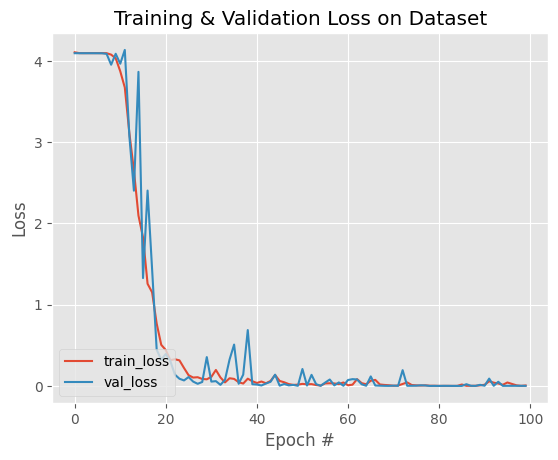

In [ ]:
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.savefig('Plot/Loss.png', format='png')
plt.savefig('Plot/Loss.svg', format='svg')

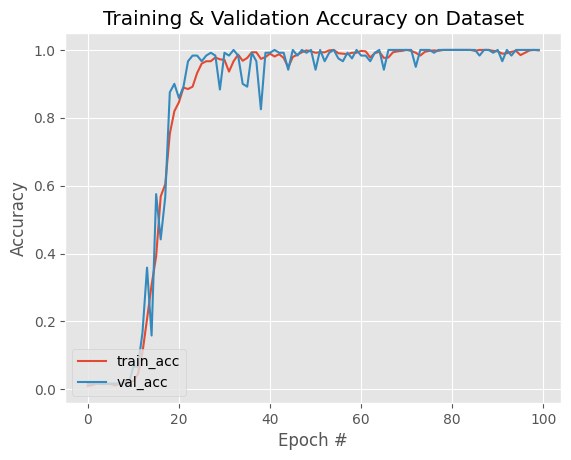

In [ ]:
N = np.arange(0, 100)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training & Validation Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig('Plot/Accuracy.png', format='png')
plt.savefig('Plot/Accuracy.svg', format='svg')

<h2>6. Save model for future used</h2>

In [ ]:
model.save('cnn_model.h5')

<h2>7. Create indexing table from train images</h2>

In [ ]:
# load dataset
imagePaths = sorted(list(paths.list_images('/My Drive/Batik Project/Dataset/Batik_nitik_960/train/')))
raw_image = []
data = []
labels = []

for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (128, 128))
    raw_image.append(image)
    image = img_to_array(image)
    data.append(image)

    # extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

data = np.array(data)
labels = np.array(labels)

In [ ]:
# encoding query label
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
cnn_model = load_model('cnn_model.h5')
cnn_model.pop()
cnn_model.pop()
cnn_model.pop()

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

In [ ]:
data = data/255.0

In [ ]:
features = cnn_model.predict(data)

23/23 [==============================] - 1s 22ms/step


In [ ]:
features.shape

(720, 1024)

<h2>8. Load and extract feature of query image</h2>

In [ ]:
# load dataset
imagePaths = sorted(list(paths.list_images('/My Drive/Batik Project/Dataset/Batik_nitik_960/test/')))
raw_query = []
query_data = []
query_labels = []

for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (128, 128))
    raw_query.append(image)
    image = img_to_array(image)
    query_data.append(image)

    # extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-2]
    query_labels.append(label)

query_data = np.array(query_data)
query_labels = np.array(query_labels)

In [ ]:
query_data = query_data/255.0
query_features = cnn_model.predict(query_data)
query_features.shape

4/4 [==============================] - 0s 22ms/step


(120, 1024)

In [ ]:
# encoding query label
le = LabelEncoder()
query_labels = le.fit_transform(query_labels)

<h2>9. Measure the distance of query and train images</h2>

In [ ]:
# define sorted function to ranking result
def sort(res_list):
    return(sorted(res_list, key=lambda x: x[4]))

In [ ]:
# define function to calculate distance between query and data
def measure_dist(query_list, data_list, dist_method):
    result = []
    ind_query = 0
    for q in query_list:
        rank = []
        ind_data = 0
        for f in data_list:
            if dist_method == 'euclidean':
                dist = euclidean(q, f)
            elif dist_method == 'cityblock':
                dist = cityblock(q, f)
            elif dist_method == 'braycurtis':
                dist = braycurtis(q, f)
            elif dist_method == 'canberra':
                dist = canberra(q,f)
            rank.append([ind_query, query_labels[ind_query], ind_data, labels[ind_data], dist])
            ind_data += 1
        rank = sort(rank)
        result.append(rank[:12])
        ind_query += 1
    result = np.array(result)
    return result

In [ ]:
# calculate using euclidean distance
result_euc = measure_dist(query_features, features, 'euclidean')

# calculate using cityblock distance
result_cit = measure_dist(query_features, features, 'cityblock')

# calculate using braycurtis distance
result_bra = measure_dist(query_features, features, 'braycurtis')

# calculate using canberra distance
result_can = measure_dist(query_features, features, 'canberra')

<h2>10. Calculate the precision and recall</h2>

In [ ]:
def calculate(x, num_of_retrieved, num_of_all_member):
    prec_list = []
    rec_list = []

    for i in range(x.shape[0]):
        relevant = 0
        for j in range(num_of_retrieved):
            if x[i][j][1]==x[i][j][3]:
                relevant +=1
        prec = relevant/num_of_retrieved
        rec = relevant/num_of_all_member
        prec_list.append(prec)
        rec_list.append(rec)

    precision = np.average(np.array(prec_list))
    recall = np.average(np.array(rec_list))

    return precision, recall

In [ ]:
# calculate recall and precision from retrieval result
n = 12
list_prec_euc = []
list_rec_euc = []
list_prec_cit = []
list_rec_cit = []
list_prec_bra = []
list_rec_bra = []
list_prec_can = []
list_rec_can = []

for k in range(n):
    prec_euc, rec_euc = calculate(result_euc, k+1, n)
    prec_cit, rec_cit = calculate(result_cit, k+1, n)
    prec_bra, rec_bra = calculate(result_bra, k+1, n)
    prec_can, rec_can = calculate(result_can, k+1, n)
    list_prec_euc.append(prec_euc)
    list_rec_euc.append(rec_euc)
    list_prec_cit.append(prec_cit)
    list_rec_cit.append(rec_cit)
    list_prec_bra.append(prec_bra)
    list_rec_bra.append(rec_bra)
    list_prec_can.append(prec_can)
    list_rec_can.append(rec_can)

In [ ]:
# calculate the average of precision and recall
avg_prec_euc = np.average(list_prec_euc)
avg_rec_euc = np.average(list_rec_euc)
avg_prec_cit = np.average(list_prec_cit)
avg_rec_cit = np.average(list_rec_cit)
avg_prec_bra = np.average(list_prec_bra)
avg_rec_bra = np.average(list_rec_bra)
avg_prec_can = np.average(list_prec_can)
avg_rec_can = np.average(list_rec_can)

In [ ]:
print("======= Avg. Precision =======")
print("Euclidean = ", avg_prec_euc)
print("Cityblock = ", avg_prec_cit)
print("Braycurtis = ", avg_prec_bra)
print("Canberra = ", avg_prec_can)

print("\n======= Avg. Recall =======")
print("Euclidean = ", avg_rec_euc)
print("Cityblock = ", avg_rec_cit)
print("Braycurtis = ", avg_rec_bra)
print("Canberra = ", avg_rec_can)

======= Avg. Precision =======
Euclidean =  0.9996938131313132
Cityblock =  0.9992589085297419
Braycurtis =  0.9994518097643099
Canberra =  0.9975295113836781

======= Avg. Recall =======
Euclidean =  0.5413773148148148
Cityblock =  0.5409722222222222
Braycurtis =  0.5411458333333333
Canberra =  0.5395254629629629


<h2>11. Plotting the precision and recall of all the measure method</h2>

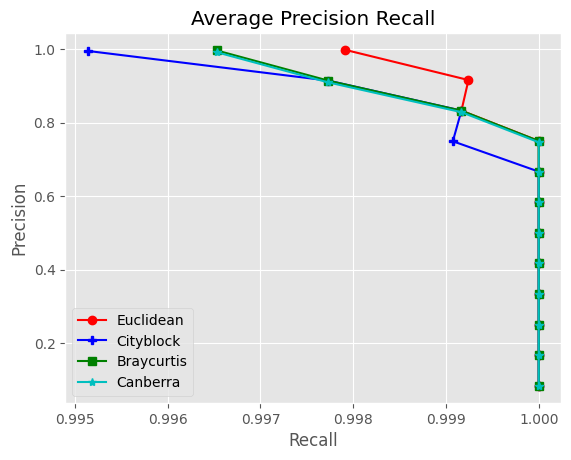

In [ ]:
plt.plot(list_prec_euc, list_rec_euc, 'ro-')
plt.plot(list_prec_cit, list_rec_cit, 'bP-')
plt.plot(list_prec_bra, list_rec_bra, 'gs-')
plt.plot(list_prec_bra, list_rec_can, 'c*-')
plt.title("Average Precision Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(["Euclidean", "Cityblock", "Braycurtis", "Canberra"])
plt.savefig('Plot/APR.png', format='png')
plt.savefig('Plot/APR.svg', format='svg')
plt.show()


<h2>12. Display the sample query and result</h2>

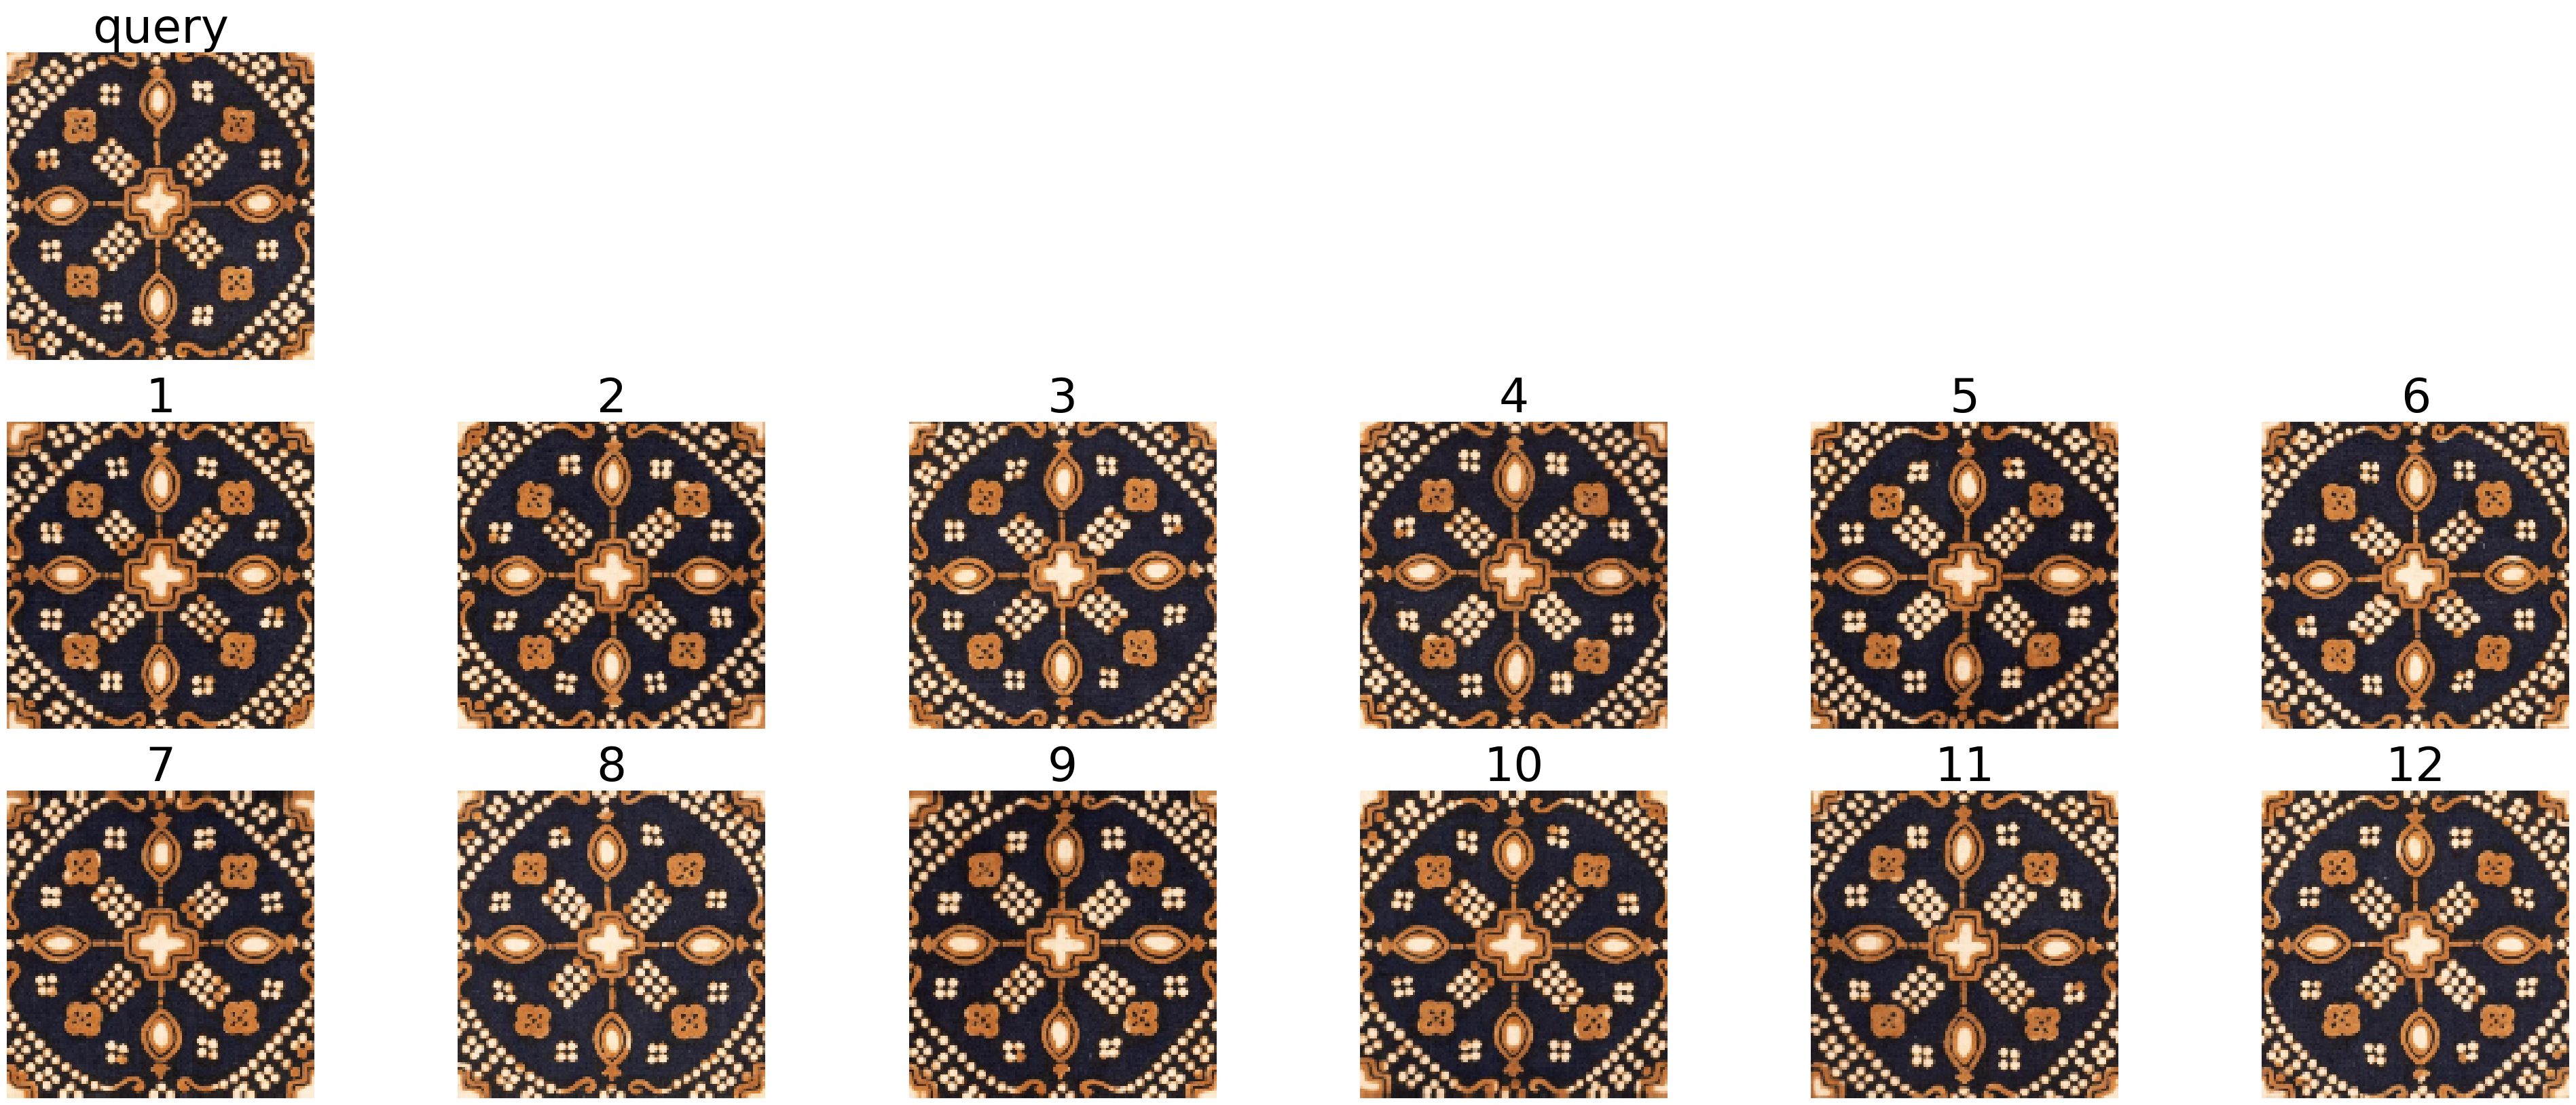

In [ ]:
fig = plt.figure(figsize=(50,20))
rows = 3
cols = 6

id_query = 0

query = raw_query[id_query]
fig.add_subplot(rows, cols, 1)
plt.imshow(cv2.cvtColor(query, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("query", fontsize=50)

i = 0
rank = 7
for res in result_can[id_query]:
    img_result = raw_image[int(res[2])]
    fig.add_subplot(rows, cols, rank)
    plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(i+1, fontsize=50)
    i += 1
    rank += 1
    plt.savefig('retrieval_result_mnetv2.png', format='png')
    plt.savefig('retrieval_result_mnetv2.svg', format='svg')
